In [79]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix


In [80]:
df = pd.read_csv('Documents/Univiersity/HonsProject/MachineLearningcsv/Cleanedcsv1/csvfile_4.csv')


In [81]:
samples = df.values

In [82]:
kmeans = KMeans(n_clusters=3)

In [83]:
kmeans.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
clusters = kmeans.cluster_centers_

In [85]:
print(clusters)

[[ 8.43602258e+03  6.46591325e+05  2.12499954e+00  1.94562924e+00
   1.26879261e+02  9.40191177e+02  5.25491429e+01  1.06076570e+01
   2.11034338e+01  1.68664030e+01  1.17280141e+02  2.81951035e+01
   5.96120178e+01  3.46987277e+01  8.25968184e+04  1.53149425e+05
   4.43443790e+05  1.12906808e+04  5.50858783e+05  1.31416223e+05
   1.46351455e+05  3.92426693e+05  4.96416769e+04  3.95272547e+05
   8.94254152e+04  6.62212033e+04  2.18124167e+05  4.87553761e+04
   1.90765595e-02  5.87280434e+01  4.68351041e+01  4.35347228e+04
   2.21915942e+04  1.03739710e+01  1.33203152e+02  3.75308822e+01
   4.32906964e+01  2.35132081e+04  9.13458186e-03  1.90765595e-02
   6.53722645e-01  1.26016126e-01  4.69647425e-02  8.68768832e-01
   4.48604920e+01  2.11034338e+01  5.96120178e+01  5.87280434e+01
   2.12499954e+00  1.26879261e+02  1.94562924e+00  9.40191177e+02
   1.09393146e+04  1.09157609e+03  8.56588166e-01  2.93020284e+01
   1.53626773e+04  3.77794031e+03  1.92169159e+04  1.29721621e+04
   2.72840

In [86]:
y_km = kmeans.fit_predict(samples)
y_km

array([0, 0, 0, ..., 0, 0, 0])

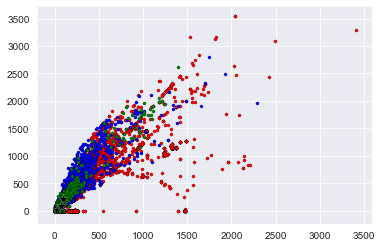

In [87]:
n = 8
m = 9

plt.scatter(samples[y_km == 0,n], samples[y_km == 0,m], s=10, edgecolors="black", linewidth=.2, color='red')
plt.scatter(samples[y_km == 1,n], samples[y_km == 1,m], s=10, edgecolors="black", linewidth=.2, color='blue')
plt.scatter(samples[y_km == 2,n], samples[y_km == 2,m], s=10, edgecolors="black", linewidth=.2, color="green")



plt.scatter(clusters[0][n], clusters[0][m], marker='*', s=100, edgecolors="white", linewidth=.2, color='black')
plt.scatter(clusters[1][n], clusters[1][m], marker='*', s=100, edgecolors="white", linewidth=.2, color='black')
plt.scatter(clusters[2][n], clusters[2][m], marker='*', s=100, edgecolors="white", linewidth=.2, color='black')


In [88]:
kmeans.inertia_

8.636195547073475e+19

In [89]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(samples)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [90]:
wcss

[5.8802177447145085e+20,
 1.5140204931798614e+20,
 8.636195547073475e+19,
 6.147420512637523e+19,
 3.746226055246356e+19,
 2.917887871089752e+19]

Text(0, 0.5, 'Within-cluster Sum of Squares - WCSS')

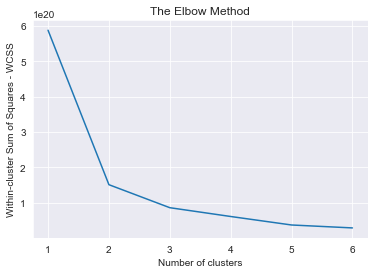

In [91]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares - WCSS')

In [112]:
samples.reshape(-1, 1)

array([[2.20e+01],
       [1.27e+06],
       [4.10e+01],
       ...,
       [0.00e+00],
       [0.00e+00],
       [1.00e+00]])

[[272479      0      0]
 [     0   9441      0]
 [     0      0   4547]]


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

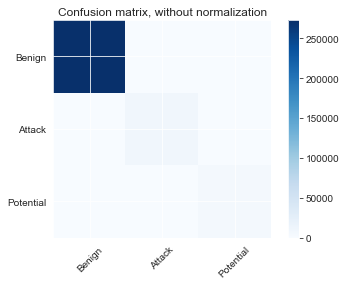

In [118]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in kmeans.fit(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_km, y_km)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign','Attack', 'Potential'],
                      title='Confusion matrix, without normalization')